In [645]:
import pandas as pd
import numpy as np
# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data understanding and EDA

In [646]:
# Importing Country-data.csv
country_df = pd.read_csv('Country-data.csv')

In [647]:
# Looking at the first five rows
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [648]:
# Check number of rows and columns in dataframe
country_df.shape

(167, 10)

In [649]:
# What type of values are stored in the columns?
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [650]:
# let's check na in data frame 
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [651]:
country_df = country_df.drop_duplicates(keep=False)
country_df.shape

(167, 10)

In [652]:
# Since we are doing analysis on countries, let's check unique values in country column
country_df['country'].nunique()

167

# Data preparation before for PCA

In [653]:
# let's take X_train as data frame on which we will do pca 
X_train = pd.DataFrame(country_df)
# remove country from X_train as we need only numeric columns for pca
X_train.drop(['country'], axis =1, inplace = True)

In [654]:
X_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [655]:
# Now let's scale X_train dataframe using StandardScaler
# Here we will use Standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [656]:
# Rows on which scaling needs to be done 
num_vars = ['child_mort', 'exports', 'health',
             'imports', 'income', 'inflation', 
            'life_expec','total_fer','gdpp']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

/Users/sachitachauhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sachitachauhan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [657]:
# check X_train data after scaling
X_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [658]:
# check X_train data description after scaling
X_train.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


# Check correlation 

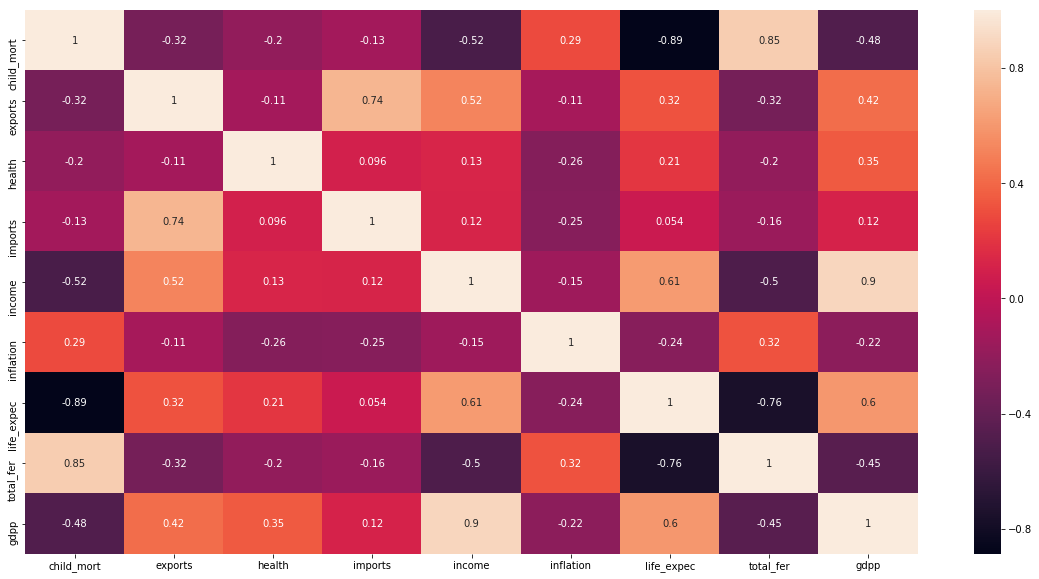

In [659]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

# PCA model building

In [660]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [661]:
#Doing the PCA on the X_train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [662]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [663]:
# Pca data frame with original column names
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


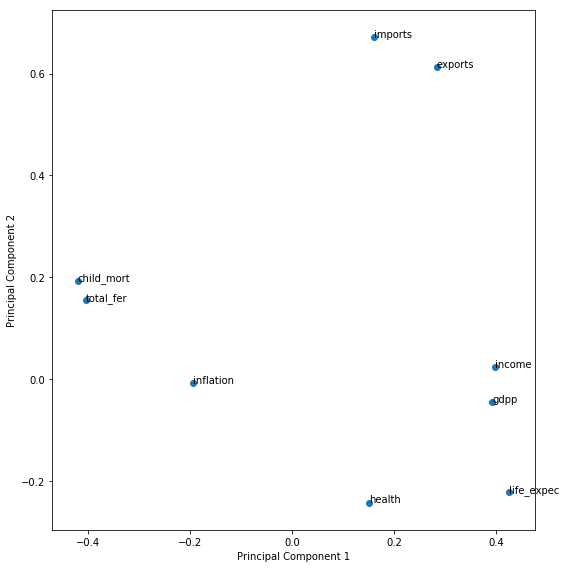

In [664]:
# PC1 and PC2 plot 
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [665]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

#### Scree plot to find out the optimal number of components 

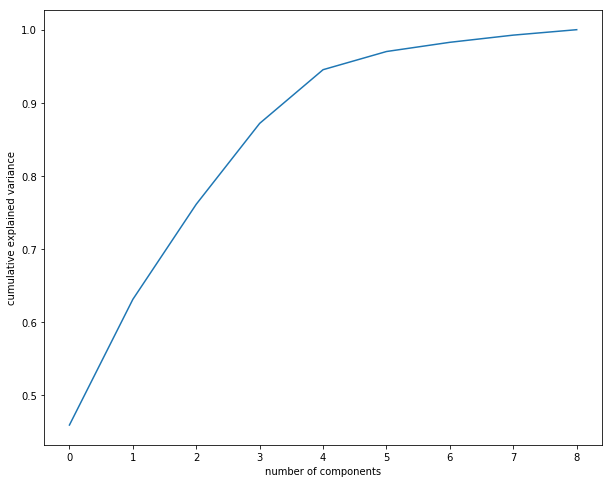

In [666]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Using incremental PCA for efficiency - saves a lot of time on larger datasets 

In [667]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [668]:
# Basis transformation - getting the data onto our PCs
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(167, 5)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [669]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

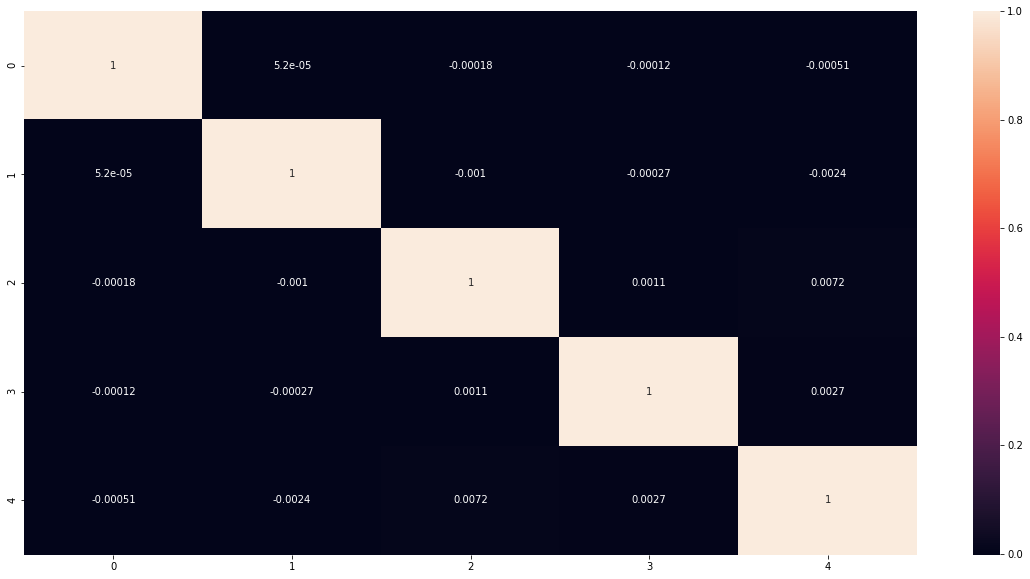

In [670]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [671]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007194543060491426 , min corr:  -0.002374704497495838


#### This time, we'll let PCA select the number of components based on a variance cutoff we provide

In [672]:
pca_again = PCA(0.90)

In [673]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(167, 5)

# Concat PCA dataframe with original dataframe

In [674]:
# Add pca result to data frame
df_pca = pd.DataFrame(data = df_train_pca
             , columns = ['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4'])
df_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [675]:
# Check shape for PCA dataframe. Number of rows will be same as original dataframe.
df_pca.shape

(167, 5)

In [676]:
# Concat PCA dataframe (df_pca) and original dataframe (country_df)
df_pca_final = pd.concat([df_pca, country_df], axis = 1)
df_pca_final.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [677]:
df_pca_final.shape

(167, 15)

# Scatter-plots of the PCs before outlier treatment

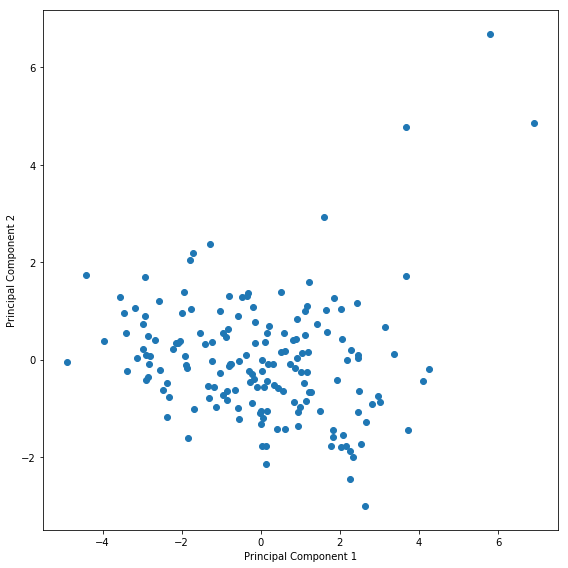

In [678]:
# Before outlier treatment let's see the scatter plot for PCs
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca_final['PCA_0'], df_pca_final['PCA_1'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Outlier treatment

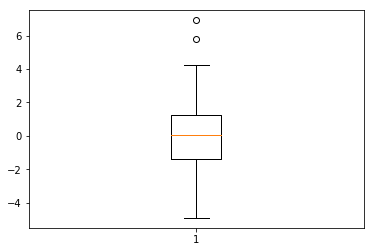

In [679]:
# outlier treatment for PCA_0
plt.boxplot(df_pca_final.PCA_0)
Q1 = df_pca_final.PCA_0.quantile(0.25)
Q3 = df_pca_final.PCA_0.quantile(0.75)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PCA_0 >= Q1 - 1.5*IQR) & (df_pca_final.PCA_0 <= Q3 + 1.5*IQR)]

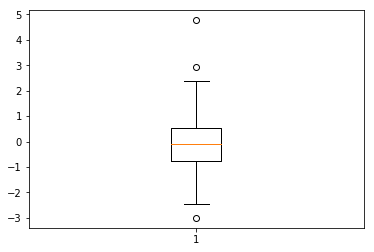

In [680]:
# outlier treatment for PCA_1
plt.boxplot(df_pca_final.PCA_1)
Q1 = df_pca_final.PCA_1.quantile(0.25)
Q3 = df_pca_final.PCA_1.quantile(0.75)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PCA_1 >= Q1 - 1.5*IQR) & (df_pca_final.PCA_1 <= Q3 + 1.5*IQR)]

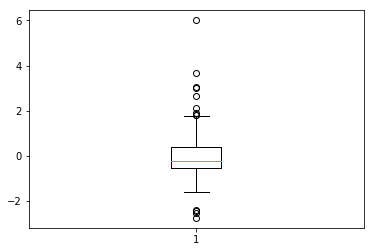

In [681]:
# outlier treatment for PCA_2
plt.boxplot(df_pca_final.PCA_2)
Q1 = df_pca_final.PCA_2.quantile(0.25)
Q3 = df_pca_final.PCA_2.quantile(0.75)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PCA_2 >= Q1 - 1.5*IQR) & (df_pca_final.PCA_2 <= Q3 + 1.5*IQR)]

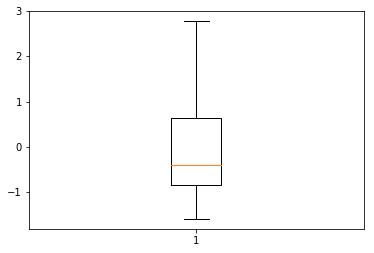

In [682]:
# outlier treatment for PCA_3
plt.boxplot(df_pca_final.PCA_3)
Q1 = df_pca_final.PCA_3.quantile(0.25)
Q3 = df_pca_final.PCA_3.quantile(0.75)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PCA_3 >= Q1 - 1.5*IQR) & (df_pca_final.PCA_3 <= Q3 + 1.5*IQR)]

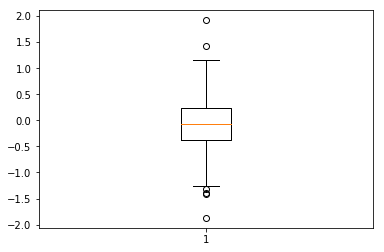

In [683]:
# outlier treatment for PCA_4
plt.boxplot(df_pca_final.PCA_4)
Q1 = df_pca_final.PCA_4.quantile(0.25)
Q3 = df_pca_final.PCA_4.quantile(0.75)
IQR = Q3 - Q1
df_pca_final= df_pca_final[(df_pca_final.PCA_4 >= Q1 - 1.5*IQR) & (df_pca_final.PCA_4 <= Q3 + 1.5*IQR)]

In [684]:
df_pca_final.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [685]:
df_pca_final.shape

(143, 15)

# Scatter-plots of the PCs after outlier treatment

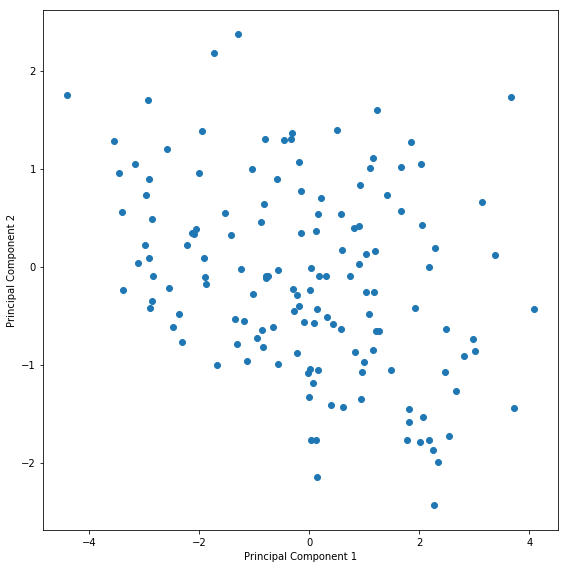

In [686]:
# Now let's see the scatter plot for PCs after outerlier treatment
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca_final['PCA_0'], df_pca_final['PCA_1'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Data preparation for clsutering

In [687]:
# for clustering we need only pca columns ('PCA_0','PCA_1','PCA_2','PCA_3','PCA_4')
df_cluster = df_pca_final[['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4']]
df_cluster.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [688]:
df_cluster.shape

(143, 5)

# k-means Clustering

### Check if k-means can be performed using hopkins measure

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [689]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [690]:
hopkins(df_cluster)

0.7136827459586078

### Let's find out the ideal value for number of cluster using Silhouette Analysis and sum of squared distances

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [691]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_cluster)
    sse_.append([k, silhouette_score(df_cluster, kmeans.labels_)])

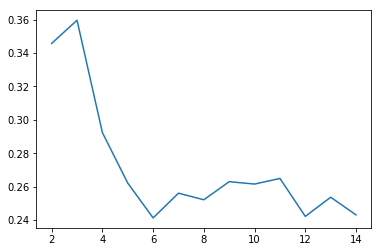

In [692]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Sum of Squared Distances

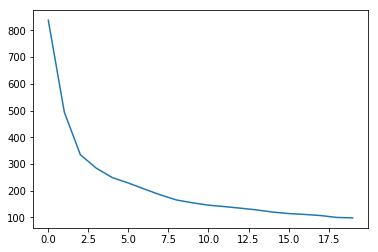

In [693]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_cluster)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### KMeans clustering with k=5

In [694]:
# Let's start with Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=123)
model_clus5.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [695]:
# Since we have performed outlier treatment before clustering 
# Some rows have been removed from original data set 
# So we will concat df_pca_final (outlier removed dataframe) with cluster lables 

df_pca_final.index = pd.RangeIndex(len(df_pca_final.index))
country_df_km5 = pd.concat([df_pca_final, pd.Series(model_clus5.labels_)], axis=1)
country_df_km5.columns = ['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4','country', 'child_mort', 'exports','health', 'imports', 'income','inflation','life_expec', 'total_fer','gdpp', 'ClusterID']
country_df_km5.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [696]:
#Perform mean analysis for all columns per cluster
# Let's make a new dataframe with cluster id's and mean of each column

km_clusters_child_mort = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(country_df_km5.groupby(["ClusterID"]).gdpp.mean())

# Dataframe with cluster id and mean value of each column
df_km5 = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports, km_clusters_income, km_clusters_inflation,km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df_km5.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean", "income_mean", "inflation_mean","life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_km5.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,13.495122,53.153659,6.939512,59.614634,16295.853659,4.054829,74.787805,1.926098,9829.024390
1,1,111.010526,24.643158,7.268421,40.468421,1496.578947,8.797368,55.794737,5.607368,621.473684
2,2,24.883333,27.460556,5.657500,33.033333,10765.555556,8.886556,72.838889,2.415000,5389.444444
3,3,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182
4,4,66.552000,39.439600,5.140800,44.296000,6359.200000,11.147600,63.352000,4.235600,3093.480000


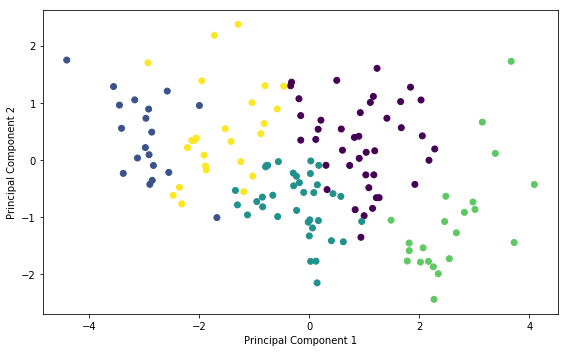

In [697]:
# Scatter plot for all the clusters created with k=5
fig = plt.figure(figsize = (8,5))
plt.scatter(country_df_km5['PCA_0'], country_df_km5['PCA_1'], c = country_df_km5['ClusterID'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [698]:
# Now Let's look at the countries present in each cluster
# Countries in ClusterID=0 
country_df_km5[country_df_km5.ClusterID==0]['country'].values

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria',
       'Cape Verde', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Estonia', 'Fiji', 'Georgia', 'Guyana', 'Hungary', 'Jordan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Montenegro', 'Panama', 'Paraguay', 'Poland', 'Serbia',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Thailand',
       'Tunisia', 'Ukraine', 'Vietnam'], dtype=object)

In [699]:
# Countries in ClusterID=1
country_df_km5[country_df_km5.ClusterID==1]['country'].values

array(['Afghanistan', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

In [700]:
# Countries in ClusterID=2
country_df_km5[country_df_km5.ClusterID==2]['country'].values

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'Chile', 'China', 'Colombia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Grenada',
       'Guatemala', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan',
       'Morocco', 'Nepal', 'Peru', 'Philippines', 'Romania', 'Russia',
       'Samoa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname',
       'Tonga', 'Turkey', 'Uruguay', 'Uzbekistan'], dtype=object)

In [701]:
# Countries in ClusterID=3
country_df_km5[country_df_km5.ClusterID==3]['country'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

In [702]:
# Countries in ClusterID=4
country_df_km5[country_df_km5.ClusterID==4]['country'].values

array(['Angola', 'Botswana', 'Cambodia', 'Comoros', 'Congo, Rep.',
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Iraq',
       'Kenya', 'Lao', 'Madagascar', 'Mauritania', 'Namibia', 'Pakistan',
       'Senegal', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tajikistan', 'Turkmenistan', 'Vanuatu', 'Yemen'], dtype=object)

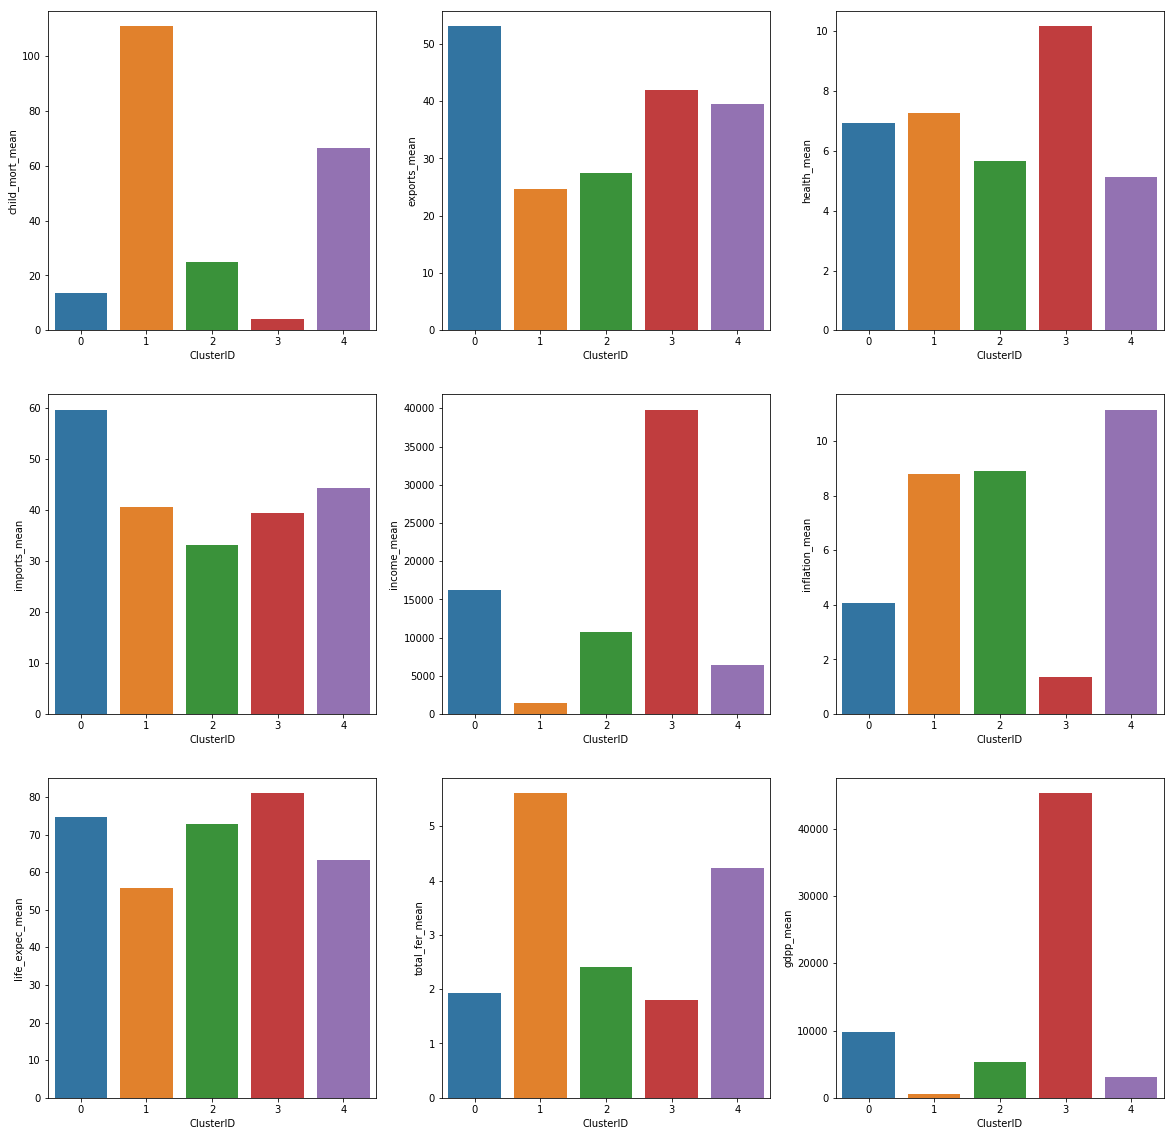

In [703]:
# Plot graphs for different clusters with k=5
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.barplot(x=df_km5.ClusterID, y=df_km5.child_mort_mean);
plt.subplot(3,3,2)
sns.barplot(x=df_km5.ClusterID, y=df_km5.exports_mean);
plt.subplot(3,3,3)
sns.barplot(x=df_km5.ClusterID, y=df_km5.health_mean);
plt.subplot(3,3,4)
sns.barplot(x=df_km5.ClusterID, y=df_km5.imports_mean);
plt.subplot(3,3,5)
sns.barplot(x=df_km5.ClusterID, y=df_km5.income_mean);
plt.subplot(3,3,6)
sns.barplot(x=df_km5.ClusterID, y=df_km5.inflation_mean);
plt.subplot(3,3,7)
sns.barplot(x=df_km5.ClusterID, y=df_km5.life_expec_mean);
plt.subplot(3,3,8)
sns.barplot(x=df_km5.ClusterID, y=df_km5.total_fer_mean);
plt.subplot(3,3,9)
sns.barplot(x=df_km5.ClusterID, y=df_km5.gdpp_mean);
plt.savefig("figure.png") # save as png
plt.show() 


### K-means clustering with k = 4 

In [706]:
# Let's try Kmeans with K=4 this time
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state=123)
model_clus4.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [707]:
# Let's concat cluster id with df_pca_final (outlier removed dataframe)and make new dataframe
country_df_km4 = pd.concat([df_pca_final, pd.Series(model_clus4.labels_)], axis=1)
country_df_km4.columns = ['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4','country', 'child_mort', 'exports','health', 'imports', 'income','inflation','life_expec', 'total_fer','gdpp', 'ClusterID']
country_df_km4.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [708]:
# Perform mean analysis for all columns per cluster
# Let's make a new dataframe with cluster id's and mean of each column
km_clusters_child_mort = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(country_df_km4.groupby(["ClusterID"]).gdpp.mean())

# Dataframe with cluster id and mean value of each column
df_km4 = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports, km_clusters_income, km_clusters_inflation,km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df_km4.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean", "income_mean", "inflation_mean","life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_km4.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,13.493023,52.595349,7.057907,59.151163,16125.813953,4.325651,74.672093,1.955116,9720.000000
1,1,94.827778,30.594722,5.916944,40.750000,3614.305556,10.739167,59.361111,5.151111,1688.638889
2,2,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182
3,3,29.240476,29.978095,5.674048,35.695238,9990.000000,8.556929,71.059524,2.591190,4938.190476


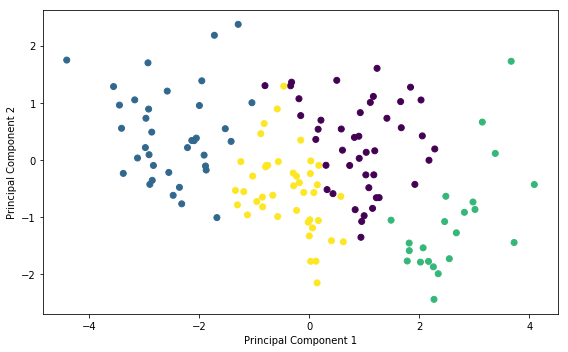

In [709]:
# Scatter plot for all the clusters created with k=4
fig = plt.figure(figsize = (8,5))
plt.scatter(country_df_km4['PCA_0'], country_df_km4['PCA_1'], c = country_df_km4['ClusterID'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [710]:
# Now Let's look at the countries present in each cluster
# Countries in ClusterID=0 
country_df_km4[country_df_km4.ClusterID==0]['country'].values

array(['Albania', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina',
       'Bulgaria', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Estonia', 'Fiji', 'Georgia', 'Guyana',
       'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon',
       'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives',
       'Mauritius', 'Montenegro', 'Panama', 'Paraguay', 'Poland',
       'Serbia', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
       'South Korea', 'Thailand', 'Tunisia', 'Ukraine', 'Vietnam'],
      dtype=object)

In [711]:
# Countries in ClusterID=1 
country_df_km4[country_df_km4.ClusterID==1]['country'].values

array(['Afghanistan', 'Angola', 'Burkina Faso', 'Burundi', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lao', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan',
       'Tanzania', 'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [712]:
# Countries in ClusterID=2 
country_df_km4[country_df_km4.ClusterID==2]['country'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

In [713]:
# Countries in ClusterID=3 
country_df_km4[country_df_km4.ClusterID==3]['country'].values

array(['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Bolivia', 'Botswana', 'Brazil', 'Cambodia', 'Cape Verde', 'China',
       'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Grenada', 'Guatemala', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Morocco', 'Nepal',
       'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa',
       'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', 'Tonga', 'Turkey', 'Turkmenistan',
       'Uruguay', 'Uzbekistan', 'Vanuatu'], dtype=object)

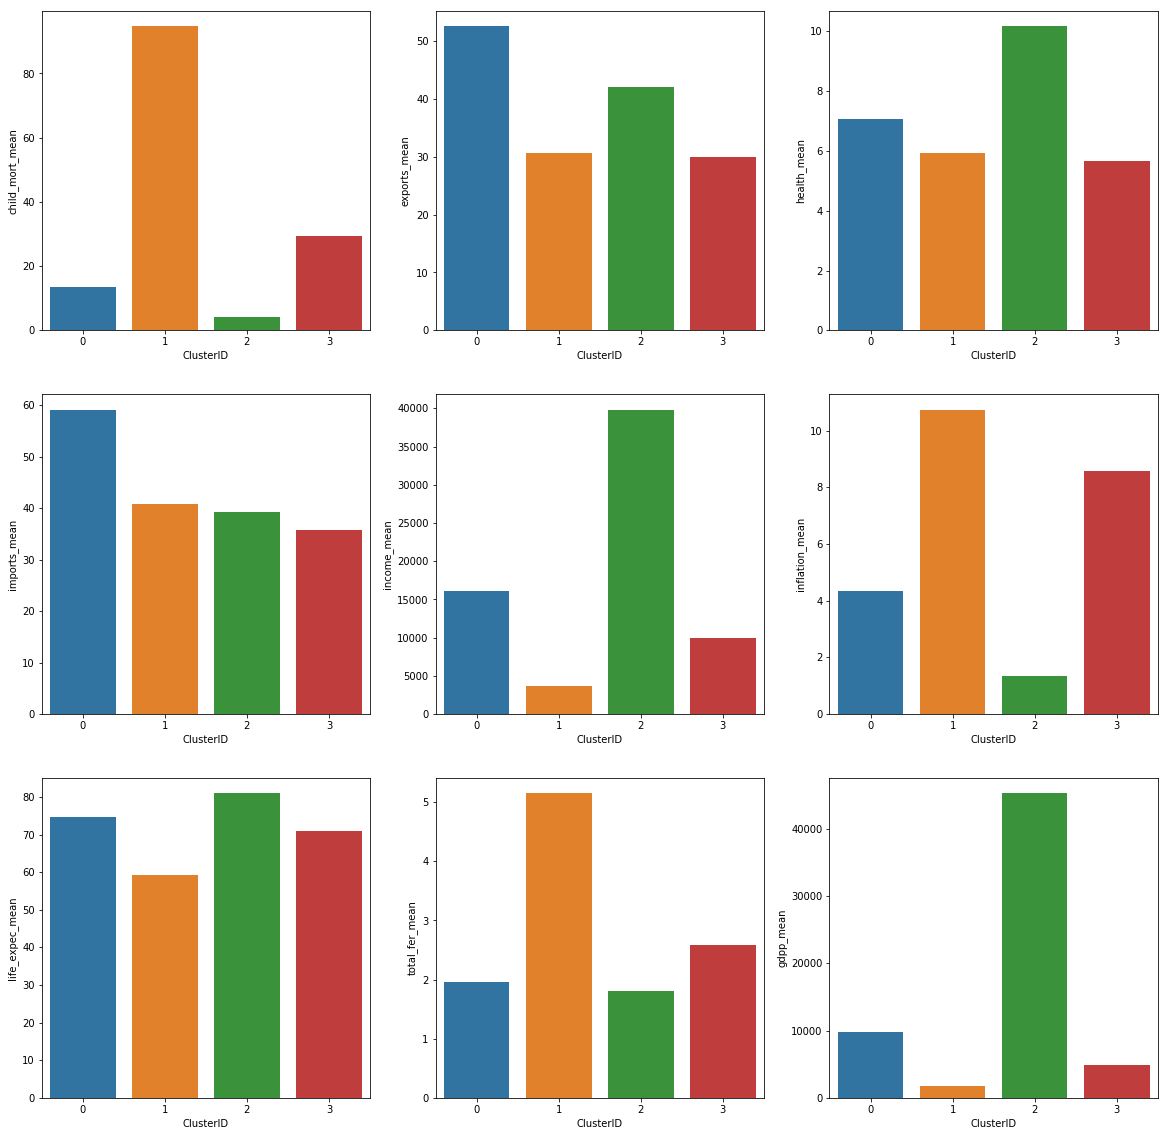

In [714]:
# Plot graphs for different clusters with k=4
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.barplot(x=df_km4.ClusterID, y=df_km4.child_mort_mean);
plt.subplot(3,3,2)
sns.barplot(x=df_km4.ClusterID, y=df_km4.exports_mean);
plt.subplot(3,3,3)
sns.barplot(x=df_km4.ClusterID, y=df_km4.health_mean);
plt.subplot(3,3,4)
sns.barplot(x=df_km4.ClusterID, y=df_km4.imports_mean);
plt.subplot(3,3,5)
sns.barplot(x=df_km4.ClusterID, y=df_km4.income_mean);
plt.subplot(3,3,6)
sns.barplot(x=df_km4.ClusterID, y=df_km4.inflation_mean);
plt.subplot(3,3,7)
sns.barplot(x=df_km4.ClusterID, y=df_km4.life_expec_mean);
plt.subplot(3,3,8)
sns.barplot(x=df_km4.ClusterID, y=df_km4.total_fer_mean);
plt.subplot(3,3,9)
sns.barplot(x=df_km4.ClusterID, y=df_km4.gdpp_mean);
plt.savefig("figure4.png") # save as png
plt.show()

# Heirarchical Clustering

In [715]:
# So let's use df_cluster for Heirarchical Clustering
df_cluster.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


####  Let's try Single Linkage first

#### In Single Linkage the distance between 2 clusters is defined as the shortest distance between points in the two clusters

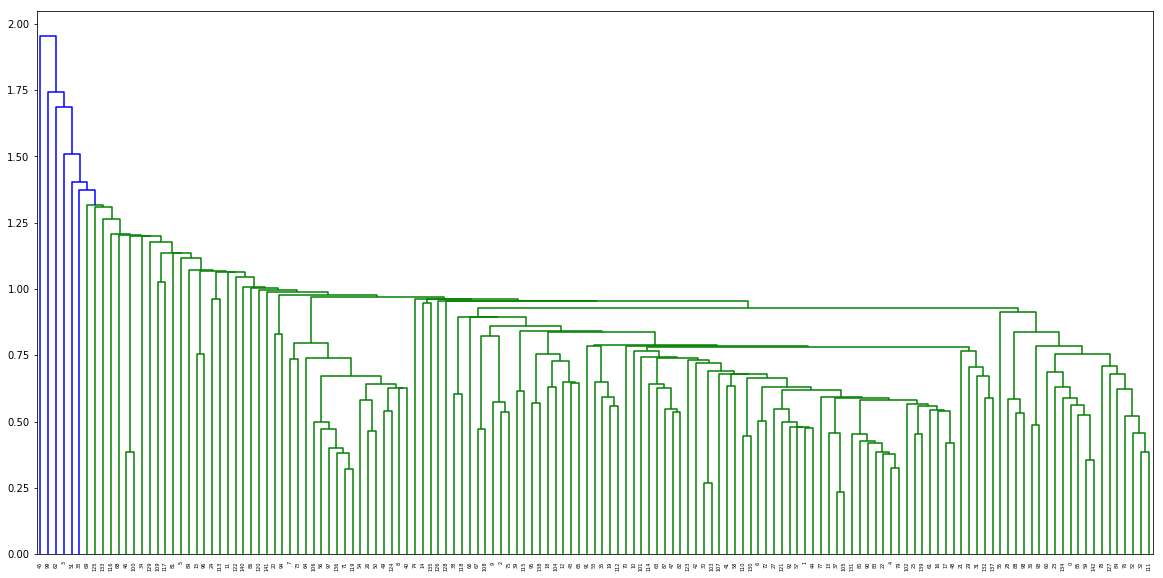

In [716]:
# heirarchical clustering
plt.figure(figsize=(20, 10))
mergings = linkage(df_cluster, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

####  Let's try Complete Linkage now

#### In Complete Linkage the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

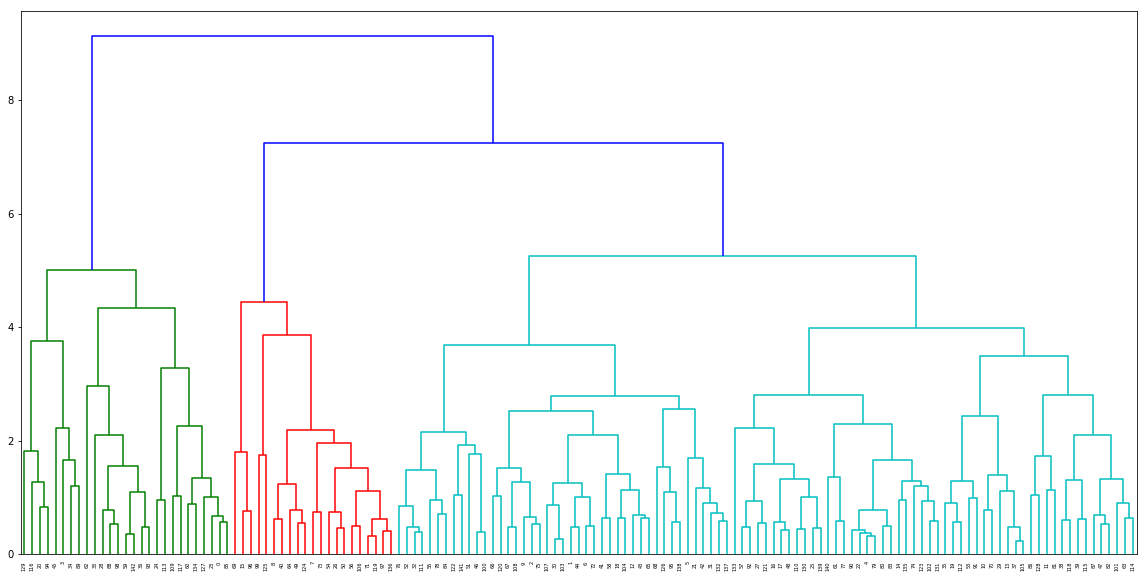

In [717]:
plt.figure(figsize=(20, 10))
mergings = linkage(df_cluster, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Heirarchical Clustering with number of clusters equal to 5

In [718]:
# Cut cluster at n_clusters =5
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
# Concat cluster id with df_pca_final (outlier removed dataframe)and make new dataframe
country_df_hc5 = pd.concat([df_pca_final, clusterCut], axis=1)
country_df_hc5.columns = ['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4','country', 'child_mort', 'exports','health', 'imports', 'income','inflation','life_expec', 'total_fer','gdpp', 'ClusterID']
country_df_hc5.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [719]:
# Perform mean analysis for all columns per cluster
# Let's make a new dataframe with cluster id's and mean of each column
km_clusters_child_mort = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(country_df_hc5.groupby(["ClusterID"]).gdpp.mean())

df_hc5 = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports, km_clusters_income, km_clusters_inflation,km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df_hc5.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean", "income_mean", "inflation_mean","life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_hc5.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,109.084211,24.032632,7.336316,38.894737,2064.473684,9.069474,55.563158,5.487368,978.947368
1,1,39.639535,26.271395,5.347674,31.841860,8742.790698,10.478140,70.244186,3.010930,4043.046512
2,2,77.275000,58.100000,5.685000,58.525000,9107.500000,13.421250,60.712500,4.611250,4736.000000
3,3,15.988462,50.115385,6.685000,57.042308,15090.000000,3.913923,74.075000,2.129808,9354.153846
4,4,4.138095,42.352381,10.299048,39.571429,40338.095238,1.319667,80.971429,1.747143,45980.952381


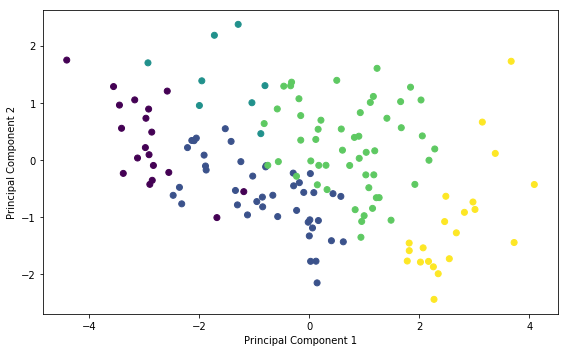

In [720]:
# Scatter plot for all the clusters created with k=4
fig = plt.figure(figsize = (8,5))
plt.scatter(country_df_hc5['PCA_0'], country_df_hc5['PCA_1'], c = country_df_hc5['ClusterID'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [721]:
# Now Let's look at the countries present in each cluster
# Countries in ClusterID=0 
country_df_hc5[country_df_hc5.ClusterID==0]['country'].values

array(['Afghanistan', 'Burkina Faso', 'Burundi', 'Chad',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda',
       'Sierra Leone', 'South Africa', 'Tanzania', 'Uganda', 'Zambia'],
      dtype=object)

In [722]:
# Countries in ClusterID=1 
country_df_hc5[country_df_hc5.ClusterID==1]['country'].values

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'China', 'Colombia', 'Comoros',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Lao',
       'Madagascar', 'Nepal', 'Pakistan', 'Peru', 'Philippines',
       'Romania', 'Russia', 'Senegal', 'Sri Lanka', 'Sudan', 'Tajikistan',
       'Turkey', 'Uruguay', 'Uzbekistan', 'Yemen'], dtype=object)

In [723]:
# Countries in ClusterID=2 
country_df_hc5[country_df_hc5.ClusterID==2]['country'].values

array(['Angola', 'Botswana', 'Congo, Rep.', 'Equatorial Guinea',
       'Mauritania', 'Namibia', 'Solomon Islands', 'Togo'], dtype=object)

In [724]:
# Countries in ClusterID=3 
country_df_hc5[country_df_hc5.ClusterID==3]['country'].values

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guyana', 'Hungary', 'Israel', 'Jordan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Montenegro', 'Morocco', 'Panama', 'Paraguay', 'Poland', 'Samoa',
       'Serbia', 'Slovak Republic', 'Slovenia', 'South Korea',
       'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga',
       'Tunisia', 'Turkmenistan', 'Ukraine', 'Vanuatu', 'Vietnam'],
      dtype=object)

In [725]:
# Countries in ClusterID=4 
country_df_hc5[country_df_hc5.ClusterID==4]['country'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom'], dtype=object)

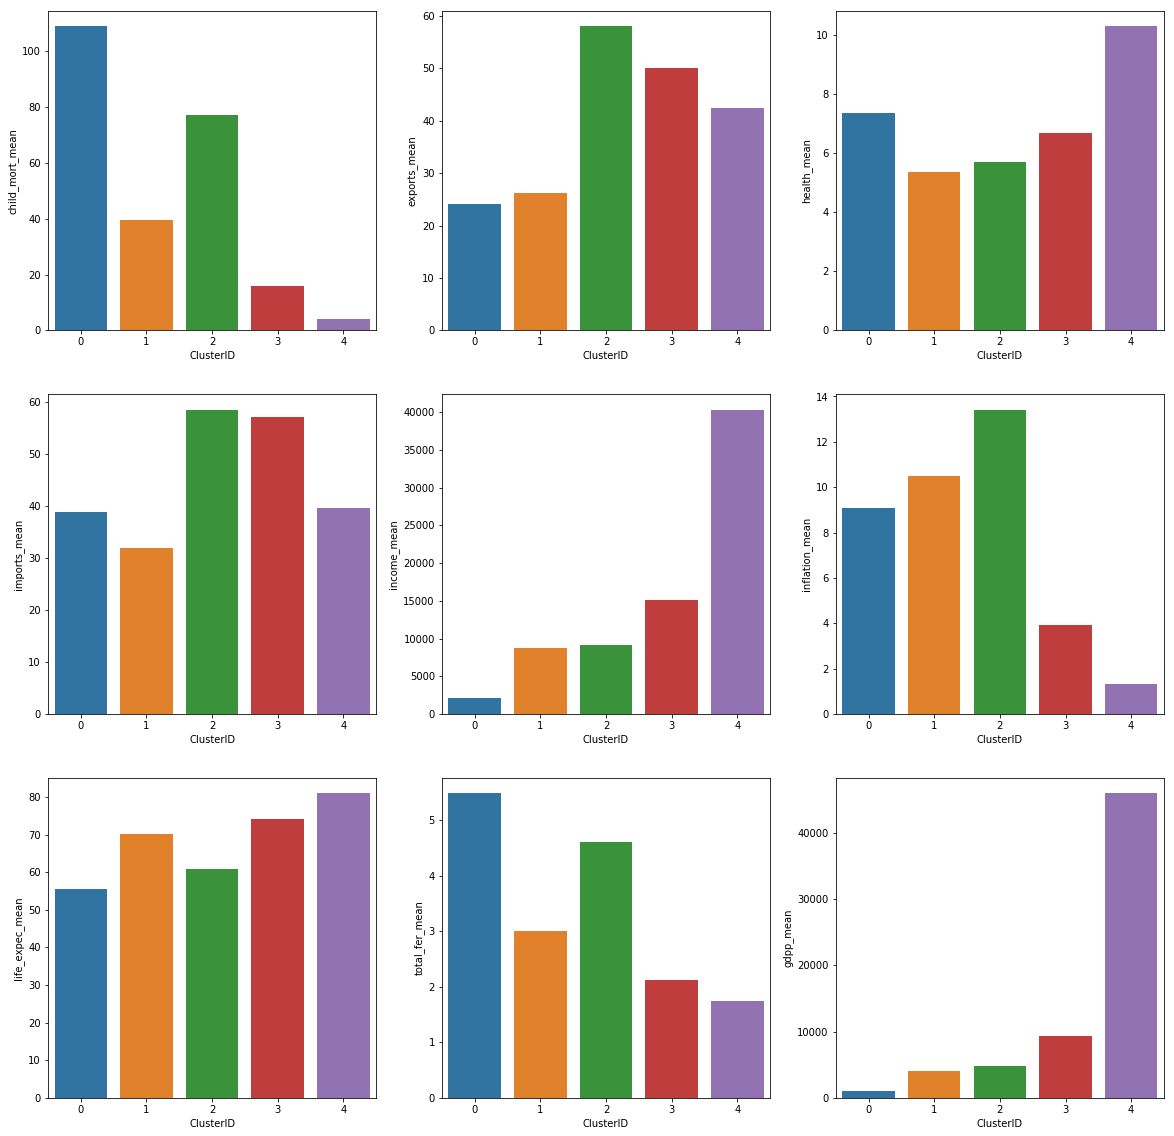

In [726]:
# Plot graphs for different clusters with n_clusters =5
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.child_mort_mean);
plt.subplot(3,3,2)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.exports_mean);
plt.subplot(3,3,3)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.health_mean);
plt.subplot(3,3,4)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.imports_mean);
plt.subplot(3,3,5)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.income_mean);
plt.subplot(3,3,6)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.inflation_mean);
plt.subplot(3,3,7)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.life_expec_mean);
plt.subplot(3,3,8)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.total_fer_mean);
plt.subplot(3,3,9)
sns.barplot(x=df_hc5.ClusterID, y=df_hc5.gdpp_mean);
plt.savefig("figureh5.png") # save as png
plt.show()

### Heirarchical Clustering with number of clusters equal to 4

In [727]:
# Cut cluster at n_clusters =4
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
# Concat cluster id with df_pca_final (outlier removed dataframe)and make new dataframe
country_df_hc4 = pd.concat([df_pca_final, clusterCut], axis=1)
country_df_hc4.columns = ['PCA_0','PCA_1','PCA_2','PCA_3','PCA_4','country', 'child_mort', 'exports','health', 'imports', 'income','inflation','life_expec', 'total_fer','gdpp', 'ClusterID']
country_df_hc4.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [728]:
# Perform mean analysis for all columns per cluster
# Let's make a new dataframe with cluster id's and mean of each column
km_clusters_child_mort = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(country_df_hc4.groupby(["ClusterID"]).gdpp.mean())

df_hc4 = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports, km_clusters_income, km_clusters_inflation,km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df_hc4.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean", "income_mean", "inflation_mean","life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_hc4.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,99.659259,34.126667,6.847037,44.711111,4151.296296,10.358889,57.088889,5.227778,2092.148148
1,1,39.639535,26.271395,5.347674,31.841860,8742.790698,10.478140,70.244186,3.010930,4043.046512
2,2,15.988462,50.115385,6.685000,57.042308,15090.000000,3.913923,74.075000,2.129808,9354.153846
3,3,4.138095,42.352381,10.299048,39.571429,40338.095238,1.319667,80.971429,1.747143,45980.952381


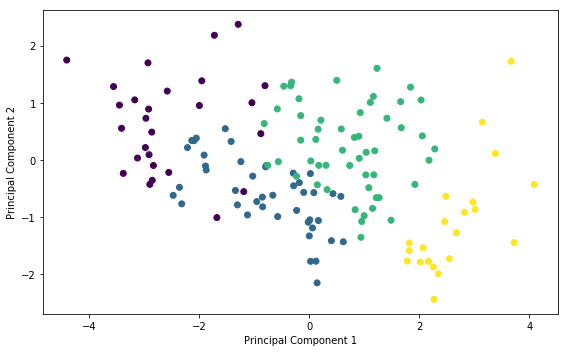

In [729]:
# Scatter plot for all the clusters created with k=5
fig = plt.figure(figsize = (8,5))
plt.scatter(country_df_hc4['PCA_0'], country_df_hc4['PCA_1'], c = country_df_hc4['ClusterID'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [730]:
# Now Let's look at the countries present in each cluster
# Countries in ClusterID=0 
country_df_hc4[country_df_hc4.ClusterID==0]['country'].values

array(['Afghanistan', 'Angola', 'Botswana', 'Burkina Faso', 'Burundi',
       'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Rwanda',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Tanzania',
       'Togo', 'Uganda', 'Zambia'], dtype=object)

In [731]:
# Countries in ClusterID=1 
country_df_hc4[country_df_hc4.ClusterID==1]['country'].values

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'China', 'Colombia', 'Comoros',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Lao',
       'Madagascar', 'Nepal', 'Pakistan', 'Peru', 'Philippines',
       'Romania', 'Russia', 'Senegal', 'Sri Lanka', 'Sudan', 'Tajikistan',
       'Turkey', 'Uruguay', 'Uzbekistan', 'Yemen'], dtype=object)

In [732]:
# Countries in ClusterID=2 
country_df_hc4[country_df_hc4.ClusterID==2]['country'].values

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guyana', 'Hungary', 'Israel', 'Jordan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Montenegro', 'Morocco', 'Panama', 'Paraguay', 'Poland', 'Samoa',
       'Serbia', 'Slovak Republic', 'Slovenia', 'South Korea',
       'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga',
       'Tunisia', 'Turkmenistan', 'Ukraine', 'Vanuatu', 'Vietnam'],
      dtype=object)

In [733]:
# Countries in ClusterID=3 
country_df_hc4[country_df_hc4.ClusterID==3]['country'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom'], dtype=object)

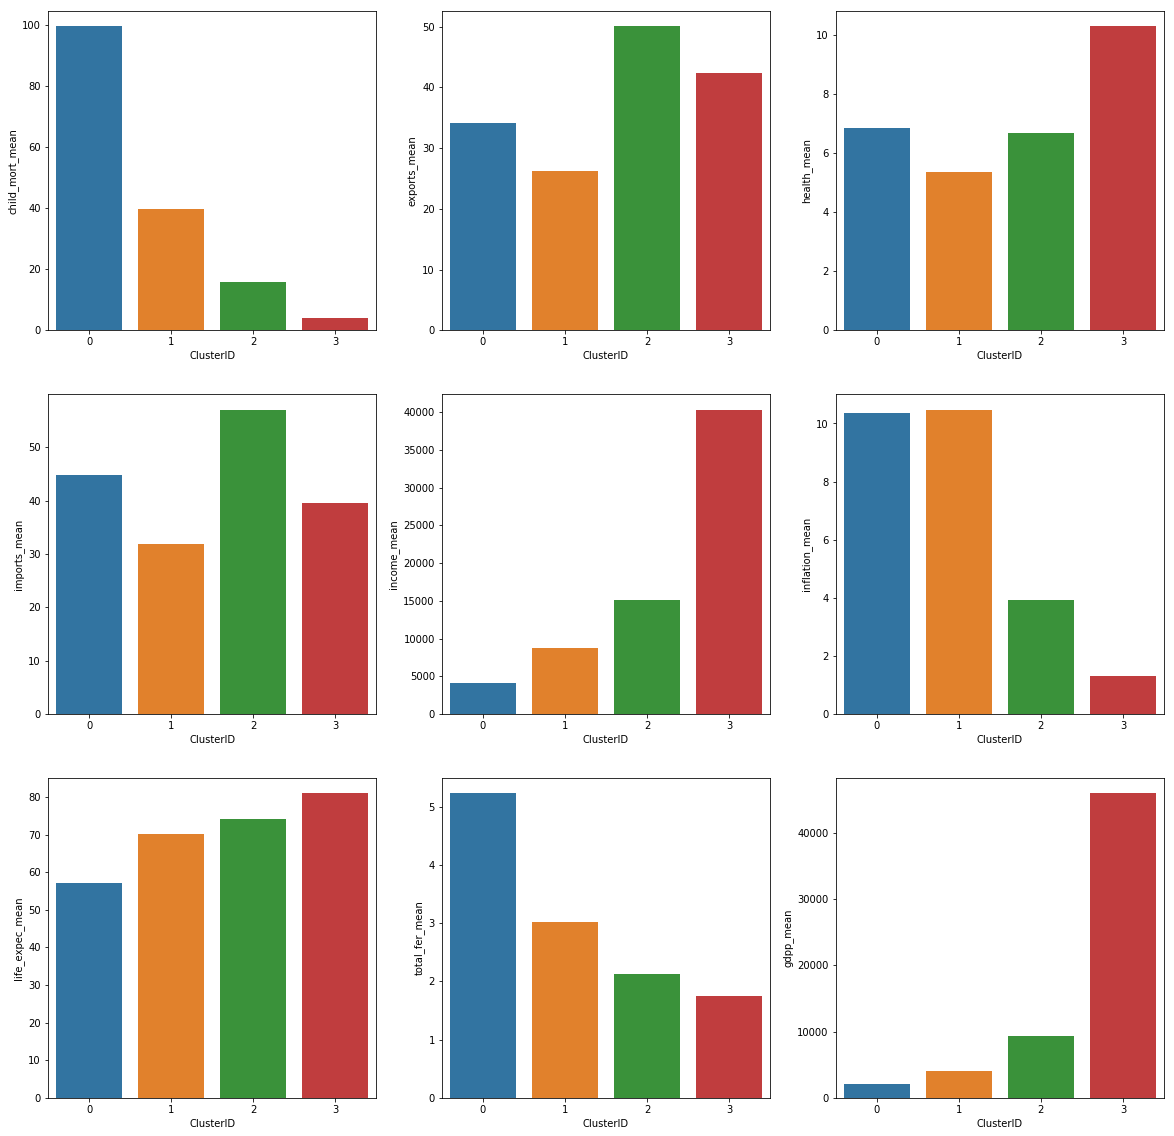

In [734]:
# Plot graphs for different clusters with n_clusters =4
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.child_mort_mean);
plt.subplot(3,3,2)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.exports_mean);
plt.subplot(3,3,3)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.health_mean);
plt.subplot(3,3,4)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.imports_mean);
plt.subplot(3,3,5)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.income_mean);
plt.subplot(3,3,6)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.inflation_mean);
plt.subplot(3,3,7)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.life_expec_mean);
plt.subplot(3,3,8)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.total_fer_mean);
plt.subplot(3,3,9)
sns.barplot(x=df_hc4.ClusterID, y=df_hc4.gdpp_mean);
plt.savefig("figureh4.png") # save as png
plt.show()

# Manual/visual analysis on the outliers countries that were dropped

In [735]:
# Let's get the removed countries first 
# df_pca_final is the dataframe which has all the data after outlier treatment
# And country_df is the original dataframe which has all the data imported from .csv file
# Now let's use these two to get the removed rows
df_dictionary = {'DF1':df_pca_final['country'],'DF2':country_df['country']}
df_removed=pd.concat(dfs_dictionary)
df_removed = pd.DataFrame(df_removed.drop_duplicates(keep=False))

In [736]:
df_removed.shape

(24, 1)

#### We have already seen above that the number of rows removed were equal to 24 and we got those 24 rows back.

In [737]:
# Now merge above data with original dataframe (country_df) to get all the columns
df_removed = df_removed.merge(country_df, left_on='country', right_on='country',how ='left')
df_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
1,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
2,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490


#### Now let's do clustering on this data to divide the data into two clusters, which will be easy to interpret.

In [738]:
# New dataframe for clustering
df_removed_cluster = pd.DataFrame(df_removed)
# for clustering we need only numeric columns 
# so remove country column
df_removed_cluster.drop(['country'], axis =1, inplace = True)
df_removed_cluster.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
1,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
2,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
3,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490


In [739]:
# Let's do Kmeans clustering with K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state=123)
model_clus2.fit(df_removed_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [740]:
# concat df_removed (removed data during outlier treatment) with cluster lables 
df_removed.index = pd.RangeIndex(len(df_removed.index))
country_removed_km2 = pd.concat([df_removed, pd.Series(model_clus2.labels_)], axis=1)
country_removed_km2.columns = ['country', 'child_mort', 'exports','health', 'imports', 'income','inflation','life_expec', 'total_fer','gdpp', 'ClusterID']
country_removed_km2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
1,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
2,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0
4,Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490,0


In [741]:
# Now Let's look at the countries present in each cluster
# Countries in ClusterID=0 
country_removed_km2[country_removed_km2.ClusterID==0]['country'].values

array(['Benin', 'Cameroon', 'Central African Republic', 'Kiribati',
       'Lesotho', 'Liberia', 'Malta', 'Micronesia, Fed. Sts.', 'Moldova',
       'Mongolia', 'Myanmar', 'Nigeria', 'Oman', 'Saudi Arabia',
       'Seychelles', 'Timor-Leste', 'Venezuela'], dtype=object)

In [742]:
# Countries in ClusterID=1 
country_removed_km2[country_removed_km2.ClusterID==1]['country'].values

array(['Brunei', 'Kuwait', 'Luxembourg', 'Qatar', 'Singapore',
       'United Arab Emirates', 'United States'], dtype=object)

### Cluster id and mean of all columns for removed data ( during outlier treatment )

In [743]:
# Let's analyse mean values in each cluster
country_removed_km2.groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,60.335294,38.659353,6.995882,57.615641,11279.882353,16.817941,65.564706,3.620588,6091.705882
1,7.400000,94.500000,5.795714,68.228571,78800.000000,7.453429,79.142857,1.814286,54157.142857


### Cluster id and mean of all columns for data without outlier ( K means with k=5 )

#### We already have this data above, so let's see that and do manaul analysis

In [744]:
# Let's see mean values in outlier removed data
# with kmeans cluster's (k=5) to analyse above clusters
country_df_km5.groupby('ClusterID').mean()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,,,,,
0,0.935443,0.292034,-0.322333,-0.763377,0.207990,13.495122,53.153659,6.939512,59.614634,16295.853659,4.054829,74.787805,1.926098,9829.024390
1,-2.976693,0.413839,-0.583979,1.104738,-0.344615,111.010526,24.643158,7.268421,40.468421,1496.578947,8.797368,55.794737,5.607368,621.473684
2,-0.221605,-0.754081,0.309216,-0.797262,-0.032574,24.883333,27.460556,5.657500,33.033333,10765.555556,8.886556,72.838889,2.415000,5389.444444
3,2.589482,-1.084266,-0.308810,1.061327,-0.105331,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182
4,-1.609883,0.497559,0.263920,0.018422,-0.195775,66.552000,39.439600,5.140800,44.296000,6359.200000,11.147600,63.352000,4.235600,3093.480000


### Manual Analysis on cluster 0 of removed data (during outlier treatment) :

#### If we compare mean values of above cluster's ( clsuter's on data without outlier  ) with cluster 0 of removed data ( removed during outlier treatment ) then we can say that cluster 0 of removed data can be merged with cluster 4 above.


In [643]:
# Right now these are the countries in cluster 4 above
# if you do manual analysis on these countries, you can observe similar pattern
country_df_km5[country_df_km5.ClusterID==4]['country'].values

array(['Angola', 'Botswana', 'Cambodia', 'Comoros', 'Congo, Rep.',
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Iraq',
       'Kenya', 'Lao', 'Madagascar', 'Mauritania', 'Namibia', 'Pakistan',
       'Senegal', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tajikistan', 'Turkmenistan', 'Vanuatu', 'Yemen'], dtype=object)

### Manual Analysis on cluster 1 of removed countries (during outlier treatment):

#### If we compare mean values of above cluster's ( clsuter's on data without outlier ) with cluster 1 of removed data ( removed during outlier treatment )  then we can say that cluster 1 of removed data can be merged with cluster 3 above.

In [644]:
# Right now these are the countries in cluster 3 above  
# if you do manual analysis on these countries, you can observe similar pattern
country_df_km5[country_df_km5.ClusterID==3]['country'].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

### And from analysis point of view both the cluster above are not relevant, So we can leave outlier as it is and not merge them back in data.

# Conclusion